# 2017 Fortune Global 500 Data Analysis

In these project based exercises selected fundamental to intermediate Pandas operations are applied to do calculations.  The Global 500 list from 2017 dataframe is used to for Data Analysis.  

Fundamental Pandas operations and calculations in these project based exercises are as follows:  
* Selecting and slicing rows and columns or selecting specific values in Pandas using column names.
* Selecting items from a Series by label.
* Vectorized operations
* Using Boolean arrays in Pandas to enable better data analysis e.g. determining in which country each of the companies in the motor industry are.
* Determining the coefficient of variation of the data.

Intermediate operations and calculations in Pandas are as follows:  
* Combining Boolean comparisons for more complex data analysis e.g. finding companies that have a large revenue but have negative profits and determining which companies are in the Technology sector but outside of the USA.
* Sorting values and using integer location to find a specific value or name e.g. determining the name of the company that has the most employees or finding the name of the top Japanese employer.
* Using aggregation (loops in Pandas) to perform advanced data analysis, e.g. finding the top employer from each country or the companies from each sector that produces the biggest return on assets (ROA).

These Pandas exercises ware done through DataQuest and they also provided the dataset f500.csv.  Originally these exercises were done using pure Python, but I converted the code to run in this Jupyter Notebook.  The original Python code is also available in the same file as this notebook.

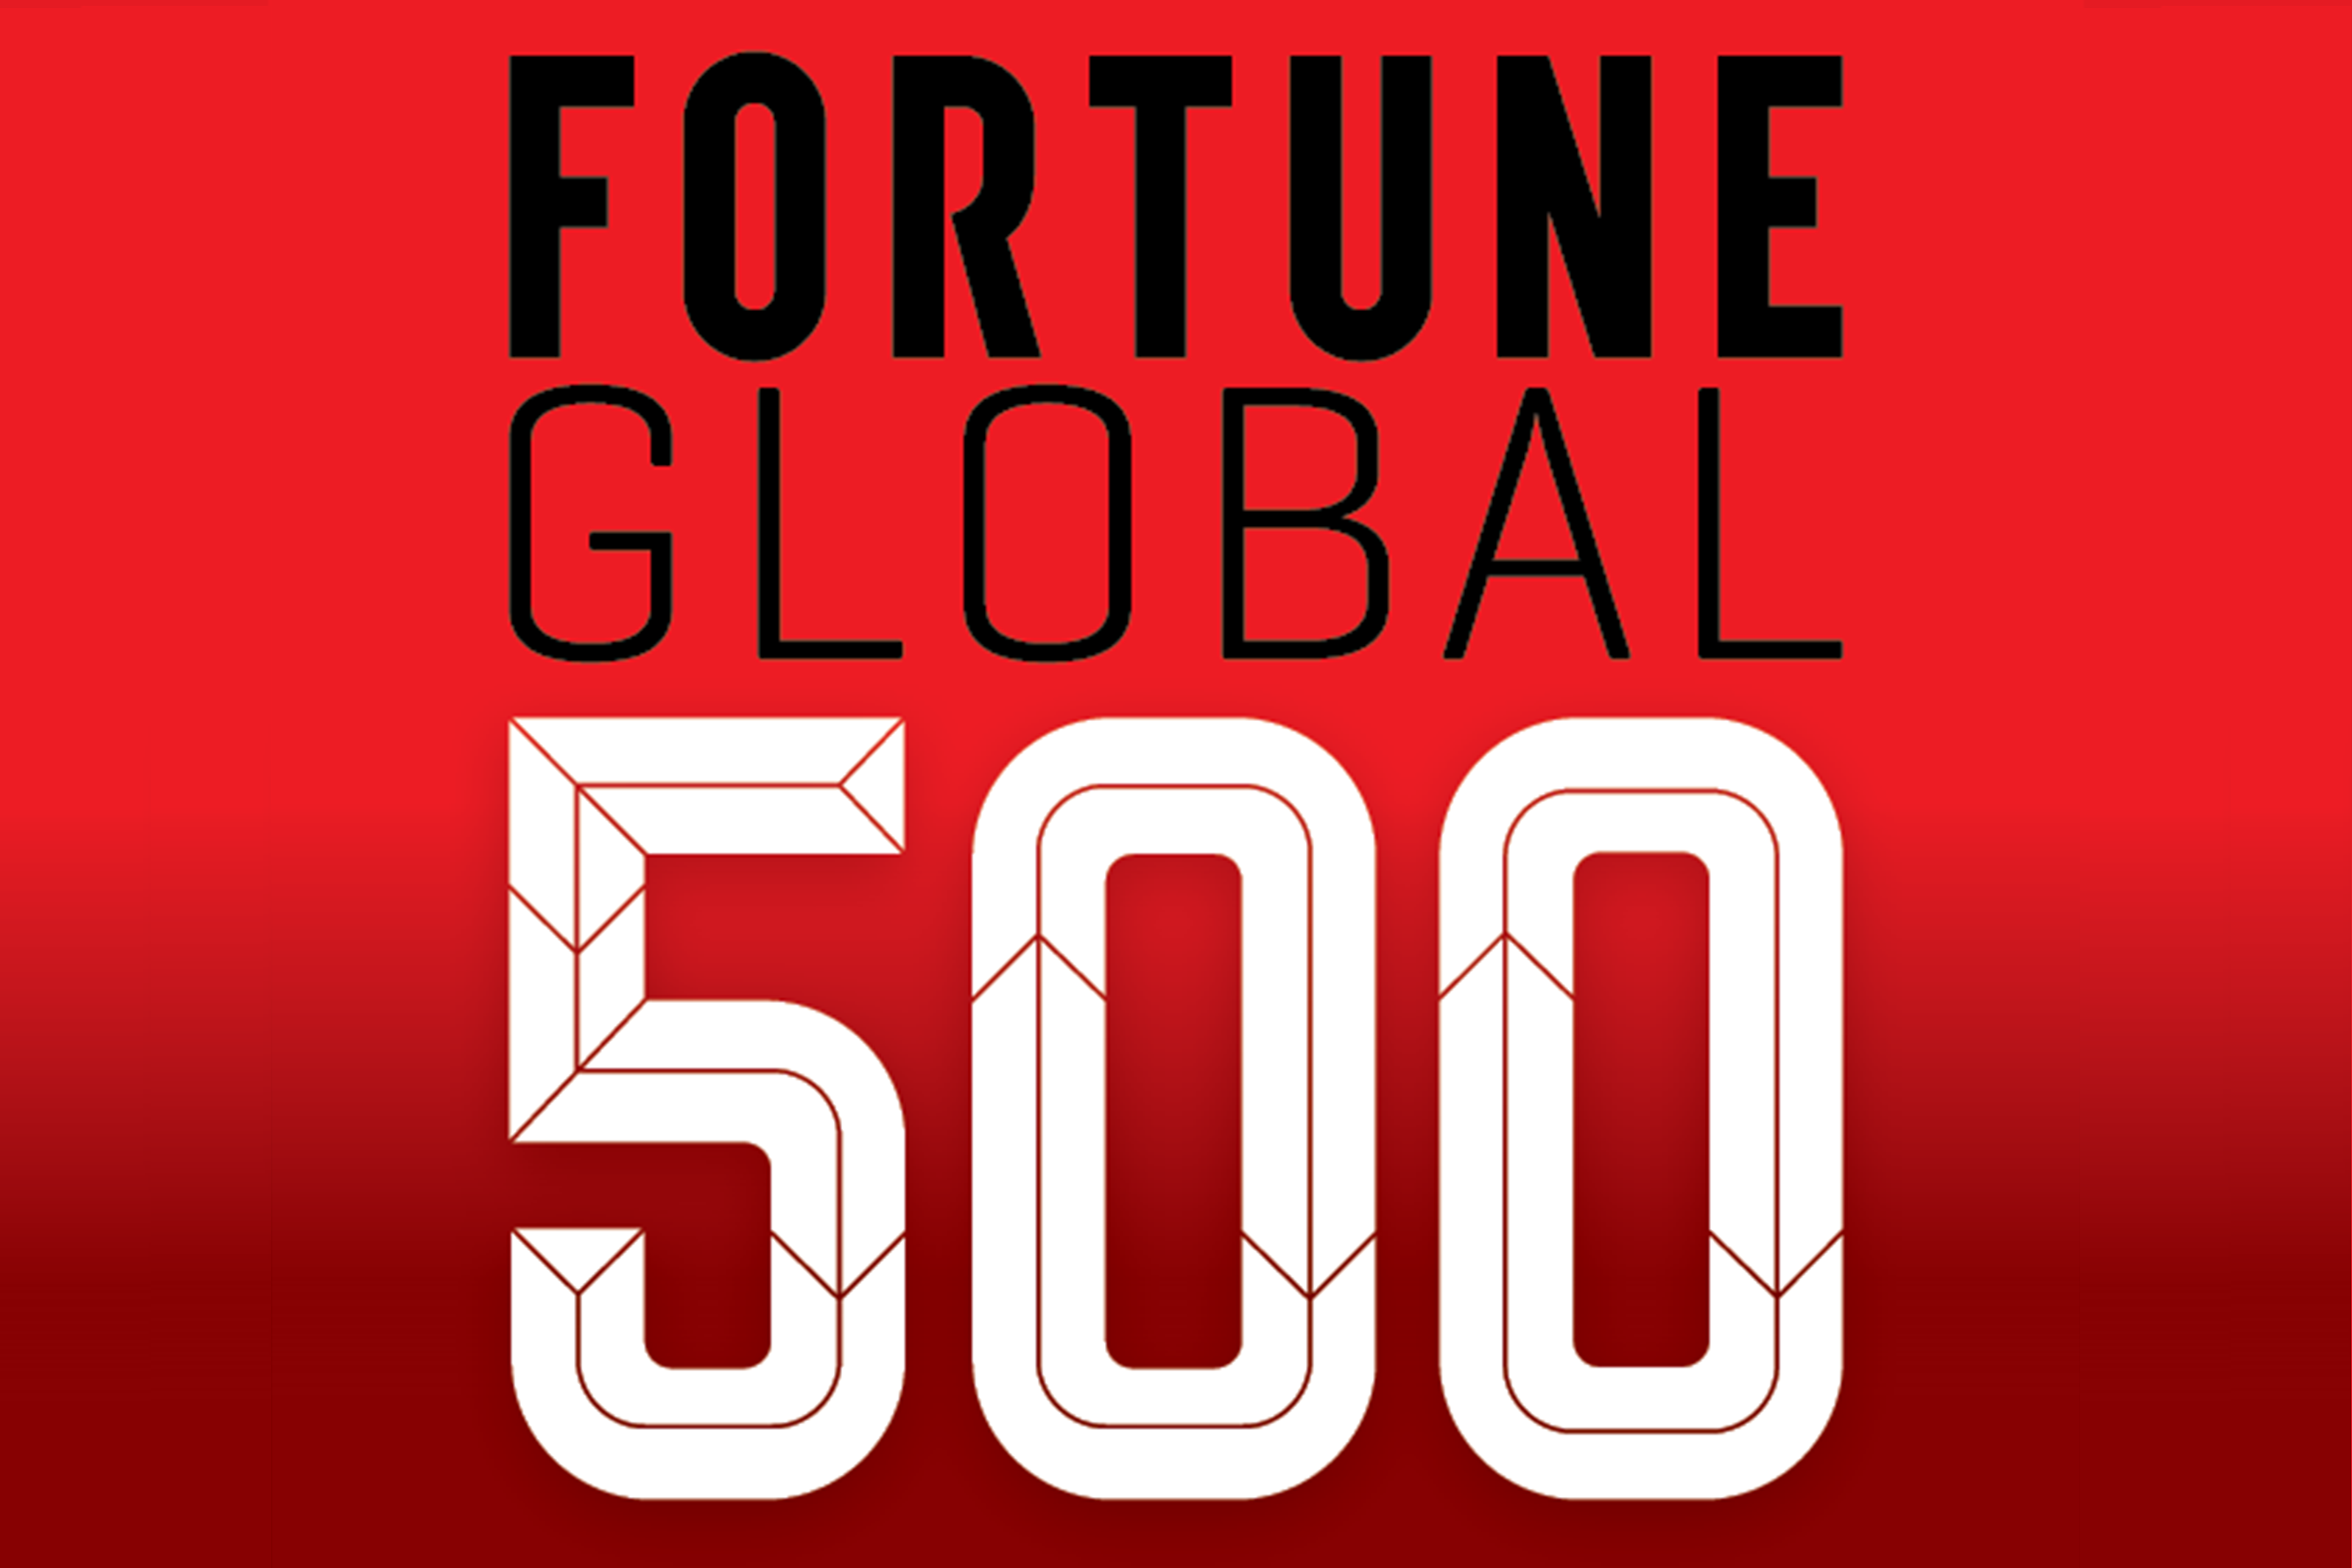

In [1]:
import pandas as pd

In [2]:
# Loading the f500.csv file using Pandas and correcting the column headers.

f500 = pd.read_csv('f500.csv',index_col=0)
f500.index.name = None

In [3]:
max_f500 = f500.max(axis=0, numeric_only=True)
max_f500

rank                            500.0
revenues                     485873.0
revenue_change                  442.3
profits                       45687.0
assets                      3473238.0
profit_change                  8909.5
previous_rank                   500.0
years_on_global_500_list         23.0
employees                   2300000.0
total_stockholder_equity     301893.0
dtype: float64

In [389]:
# Viewing the data:

f500

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337
New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507
Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111
TUI,499,21655,-5.5,1151.7,16247,195.5,Friedrich Joussen,Travel Services,Business Services,467,Germany,"Hanover, Germany",http://www.tuigroup.com,23,66779,3006


In [390]:
f500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Walmart to AutoNation
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rank                      500 non-null    int64  
 1   revenues                  500 non-null    int64  
 2   revenue_change            498 non-null    float64
 3   profits                   499 non-null    float64
 4   assets                    500 non-null    int64  
 5   profit_change             436 non-null    float64
 6   ceo                       500 non-null    object 
 7   industry                  500 non-null    object 
 8   sector                    500 non-null    object 
 9   previous_rank             500 non-null    int64  
 10  country                   500 non-null    object 
 11  hq_location               500 non-null    object 
 12  website                   500 non-null    object 
 13  years_on_global_500_list  500 non-null    int64  
 14  em

In [391]:
# We have 500 rows (company entries) and 16 columns.
# The column names are in snake case, which is easier to use than some other formats.
# 5 of the columns are of the type 'object'.  The other columns have numerical values.  
# We can also note that there are many missing values in the profit_change column, 1 missing value in the profits column and 2 
# missing values in the revenue_change column.

In [392]:
f500_type = type(f500)
f500_shape = f500.shape

f500_type

pandas.core.frame.DataFrame

In [393]:
# Our data has 500 rows (entries) and 16 columns.

f500_shape

(500, 16)

In [394]:
# Viewing the first 5 entries from the Fortune Global 500 list:

f500.head(5)

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210


In [395]:
# Viewing the last 5 entries from the Fortune Global 500 list:

f500.tail(5)

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337
New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507
Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111
TUI,499,21655,-5.5,1151.7,16247,195.5,Friedrich Joussen,Travel Services,Business Services,467,Germany,"Hanover, Germany",http://www.tuigroup.com,23,66779,3006
AutoNation,500,21609,3.6,430.5,10060,-2.7,Michael J. Jackson,Specialty Retailers,Retailing,0,USA,"Fort Lauderdale, FL",http://www.autonation.com,12,26000,2310


In [396]:
# Listing all the industries on the Fortune Global 500 list.  Not all of them are displayed in the output:

industries = f500.loc[:, "industry"]

industries

Walmart                                     General Merchandisers
State Grid                                              Utilities
Sinopec Group                                  Petroleum Refining
China National Petroleum                       Petroleum Refining
Toyota Motor                             Motor Vehicles and Parts
                                               ...               
Teva Pharmaceutical Industries                    Pharmaceuticals
New China Life Insurance          Insurance: Life, Health (stock)
Wm. Morrison Supermarkets                    Food and Drug Stores
TUI                                               Travel Services
AutoNation                                    Specialty Retailers
Name: industry, Length: 500, dtype: object

In [397]:
# Listing the country for each company:

countries = f500["country"]
countries

Walmart                               USA
State Grid                          China
Sinopec Group                       China
China National Petroleum            China
Toyota Motor                        Japan
                                   ...   
Teva Pharmaceutical Industries     Israel
New China Life Insurance            China
Wm. Morrison Supermarkets         Britain
TUI                               Germany
AutoNation                            USA
Name: country, Length: 500, dtype: object

In [398]:
# Listing the revenues for each company in 2017 and also the number of years that the company has been on the Global 500 list:

revenues_years = f500[["revenues", "years_on_global_500_list"]]
revenues_years

,revenues,years_on_global_500_list
Walmart,485873,23
State Grid,315199,17
Sinopec Group,267518,19
China National Petroleum,262573,17
Toyota Motor,254694,23
...,...,...
Teva Pharmaceutical Industries,21903,1
New China Life Insurance,21796,2
Wm. Morrison Supermarkets,21741,13
TUI,21655,23


In [399]:
# Selecting adn displying the columns from ceo to sector for each company:

ceo_to_sector = f500.loc[:, "ceo":"sector"]
ceo_to_sector

,ceo,industry,sector
Walmart,C. Douglas McMillon,General Merchandisers,Retailing
State Grid,Kou Wei,Utilities,Energy
Sinopec Group,Wang Yupu,Petroleum Refining,Energy
China National Petroleum,Zhang Jianhua,Petroleum Refining,Energy
Toyota Motor,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts
...,...,...,...
Teva Pharmaceutical Industries,Yitzhak Peterburg,Pharmaceuticals,Health Care
New China Life Insurance,Wan Feng,"Insurance: Life, Health (stock)",Financials
Wm. Morrison Supermarkets,David T. Potts,Food and Drug Stores,Food & Drug Stores
TUI,Friedrich Joussen,Travel Services,Business Services


In [400]:
# Selecting the row (entry) "Toyota Motor".  Toyota Motor was ranked 5th on the Fortune Golbal 500 list in 2017.

toyota = f500.loc["Toyota Motor"]
toyota

rank                                                   5
revenues                                          254694
revenue_change                                       7.7
profits                                          16899.3
assets                                            437575
profit_change                                      -12.3
ceo                                          Akio Toyoda
industry                        Motor Vehicles and Parts
sector                            Motor Vehicles & Parts
previous_rank                                          8
country                                            Japan
hq_location                                Toyota, Japan
website                     http://www.toyota-global.com
years_on_global_500_list                              23
employees                                         364445
total_stockholder_equity                          157210
Name: Toyota Motor, dtype: object

In [401]:
# Selecting 2 companies that manufacture alcohol beverages and 1 company that mainly manufactures non-alcoholic drinks:

drink_companies = f500.loc[["Anheuser-Busch InBev", "Coca-Cola", "Heineken Holding"]]
drink_companies

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
Anheuser-Busch InBev,206,45905,5.3,1241.0,258381,-85.0,Carlos Brito,Beverages,"Food, Beverages & Tobacco",211,Belgium,"Leuven, Belgium",http://www.ab-inbev.com,12,206633,71339
Coca-Cola,235,41863,-5.5,6527.0,87270,-11.2,James B. Quincey,Beverages,"Food, Beverages & Tobacco",206,USA,"Atlanta, GA",http://www.coca-colacompany.com,23,100300,23062
Heineken Holding,468,23044,-0.7,861.5,41469,-18.9,Jean-Francois van Boxmeer,Beverages,"Food, Beverages & Tobacco",459,Netherlands,"Amsterdam, Netherlands",http://www.theheinekencompany.com,11,73525,6958


In [402]:
# Selecting companies that are in the middle of the 2017 Fortune Global 500 list.  Only the columns from rank to country are 
# selected:

middle_companies = f500.loc["Tata Motors":"Nationwide", "rank":"country"]
middle_companies

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country
Tata Motors,247,40329,-4.2,1111.6,42162,-34.0,Guenter Butschek,Motor Vehicles and Parts,Motor Vehicles & Parts,226,India
Aluminum Corp. of China,248,40278,6.0,-282.5,75089,NaN,Yu Dehui,Metals,Materials,262,China
Mitsui,249,40275,1.6,2825.3,103231,NaN,Tatsuo Yasunaga,Trading,Wholesalers,245,Japan
Manulife Financial,250,40238,49.4,2209.7,537461,28.9,Donald A. Guloien,"Insurance: Life, Health (stock)",Financials,394,Canada
China Minsheng Banking,251,40234,-5.2,7201.6,848389,-1.8,Zheng Wanchun,Banks: Commercial and Savings,Financials,221,China
China Pacific Insurance (Group),252,40193,2.2,1814.9,146873,-35.7,Huo Lianhong,"Insurance: Life, Health (stock)",Financials,251,China
American Airlines Group,253,40180,-2.0,2676.0,51274,-64.8,W. Douglas Parker,Airlines,Transportation,236,USA
Nationwide,254,40074,-0.4,334.3,197790,-42.4,Stephen S. Rasmussen,Insurance: Property and Casualty (Mutual),Financials,241,USA


In [403]:
countries = f500["country"].unique()
countries

array(['USA', 'China', 'Japan', 'Germany', 'Netherlands', 'Britain',
       'South Korea', 'Switzerland', 'France', 'Taiwan', 'Singapore',
       'Italy', 'Russia', 'Spain', 'Brazil', 'Mexico', 'Luxembourg',
       'India', 'Malaysia', 'Thailand', 'Australia', 'Belgium', 'Norway',
       'Canada', 'Ireland', 'Indonesia', 'Denmark', 'Saudi Arabia',
       'Sweden', 'Finland', 'Venezuela', 'Turkey', 'U.A.E', 'Israel'],
      dtype=object)

In [404]:
# Viewing the number of companies, on the 2017 Fortune Global 500 list, that are situated in each country.  The countries are displayed
# in decending order according to the number of companies in each country:

countries_counts = f500["country"].value_counts()
countries_counts

USA             132
China           109
Japan            51
France           29
Germany          29
Britain          24
South Korea      15
Netherlands      14
Switzerland      14
Canada           11
Spain             9
Brazil            7
Australia         7
Italy             7
India             7
Taiwan            6
Russia            4
Ireland           4
Sweden            3
Singapore         3
Mexico            2
Thailand          1
Malaysia          1
Turkey            1
Venezuela         1
Luxembourg        1
Indonesia         1
U.A.E             1
Israel            1
Denmark           1
Saudi Arabia      1
Finland           1
Norway            1
Belgium           1
Name: country, dtype: int64

In [405]:
# Selecting the 3 North American countries value_counts() that appear on the the 2017 Fortune Global 500 list:

north_america = countries_counts[["USA", "Canada", "Mexico"]]
north_america

USA       132
Canada     11
Mexico      2
Name: country, dtype: int64

In [406]:
# There are 132 companies situated in the USA, 11 in Canada and 2 Mexico.

In [407]:
# Selecting the value_counts() for India:

india = countries_counts["India"]
india

7

In [408]:
# There are 7 companies situated in India.

#### Vectorized operation:

In [409]:
# Determining the difference in rank for each company (negative rank_diff indicates companies that moved down in ranking and
# positive rank_diff indicates companies that moved up in ranking)

rank_diff = f500['previous_rank'] - f500['rank']
rank_diff

Walmart                             0
State Grid                          0
Sinopec Group                       1
China National Petroleum           -1
Toyota Motor                        3
                                 ... 
Teva Pharmaceutical Industries   -496
New China Life Insurance          -70
Wm. Morrison Supermarkets         -61
TUI                               -32
AutoNation                       -500
Length: 500, dtype: int64

In [410]:
# Adding a rank_difference column (between previous rank and current rank) to the dataframe:

f500["rank_difference"] = rank_diff

In [411]:
# Creating a dataframe for companies that had a ranking in 2016 and also 2017:

f500_ranked = f500[f500["previous_rank"] > 0]
f500_ranked

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_difference
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798,0
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456,0
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523,1
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893,-1
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
National Grid,491,22036,-3.2,10150.6,82310,160.2,John Pettigrew,Utilities,Energy,471,Britain,"London, Britain",http://www.nationalgrid.com,12,22132,25463,-20
Telecom Italia,493,21941,-17.4,1999.4,74295,NaN,Flavio Cattaneo,Telecommunications,Telecommunications,404,Italy,"Milan, Italy",http://www.telecomitalia.com,18,61227,22366,-89
New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507,-70
Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111,-61


In [412]:
# Companies that were not ranked in 2016, but were ranked in 2017

f500_notranked = f500[f500["previous_rank"] <= 0]
f500_notranked

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_difference
Legal & General Group,49,105235,442.3,1697.9,577954,3.4,Nigel Wilson,"Insurance: Life, Health (stock)",Financials,0,Britain,"London, Britain",http://www.legalandgeneralgroup.com,17,8939,8579,-49
Uniper,91,74407,NaN,-3557.5,51541,NaN,Klaus Schafer,Energy,Energy,0,Germany,"Dusseldorf, Germany",http://www.uniper.energy,1,12890,12889,-91
Dell Technologies,124,64806,18.1,-1672.0,118206,NaN,Michael S. Dell,"Computers, Office Equipment",Technology,0,USA,"Round Rock, TX",http://www.delltechnologies.com,17,138000,13243,-124
Anbang Insurance Group,139,60800,124.0,3883.9,430040,0.9,Wu Xiaohui,"Insurance: Life, Health (Mutual)",Financials,0,China,"Beijing, China",http://www.anbanggroup.com,1,40707,20372,-139
Albertsons Cos.,141,59678,1.6,-373.3,23755,NaN,Robert G. Miller,Food and Drug Stores,Food & Drug Stores,0,USA,"Boise, ID",http://www.albertsons.com,13,273000,1371,-141
Hewlett Packard Enterprise,181,50123,NaN,3161.0,79679,NaN,Margaret C. Whitman,Information Technology Services,Technology,0,USA,"Palo Alto, CA",http://www.hpe.com,1,195000,31448,-181
Hengli Group,268,37880,12.2,821.7,14838,43.7,Chen Jianhua,Textiles,Industrials,0,China,"Suzhou City, China",http://www.hengli.com,1,61400,5498,-268
Johnson Controls International,272,37674,-6.3,-868.0,63253,-155.5,Alex A. Molinaroli,Industrial Machinery,Industrials,0,Ireland,"Cork, Ireland",http://www.johnsoncontrols.com,13,209000,24118,-272
Chubb,342,31469,65.7,4135.0,159786,45.9,Evan G. Greenberg,Insurance: Property and Casualty (Stock),Financials,0,Switzerland,"Zurich, Switzerland",http://www.chubb.com,1,31000,48275,-342
Charter Communications,376,29003,197.3,3522.0,149067,NaN,Thomas M. Rutledge,Telecommunications,Telecommunications,0,USA,"Stamford, CT",http://www.charter.com,1,91500,40139,-376


In [413]:
# 33 companies have not been ranked in 2016  
# We will find the companies that were ranked in 2016 and are the top movers from their rank in 2016 
# to 2017.

In [414]:
# Viewing our variable top_movers, we see that Centene, China Minmetals, SK Holdings, E.ON, Aviva, HNA Group and BHP Billiton 
# were the top 7 companies that had the greatest shift in their ranking from 2016 to 2017:

top_movers = f500_ranked["rank_difference"].abs().sort_values(ascending = False)  # Method chaning used
top_movers.head(10)

Centene                   226
China Minmetals           203
SK Holdings               199
E.ON                      199
Aviva                     189
HNA Group                 183
BHP Billiton              182
China Evergrande Group    158
CK Hutchison Holdings     154
HP                        146
Name: rank_difference, dtype: int64

In [415]:
# The top 7 companies that moved up or down with a great number of rankings from 2016 to 2017:

big_movers = f500_ranked.loc[['Centene', 'China Minmetals', 'SK Holdings', 'E.ON', 'Aviva', 'HNA Group', 'BHP Billiton'], ['rank', 'previous_rank', 'rank_difference']]
big_movers

,rank,previous_rank,rank_difference
Centene,244,470,226
China Minmetals,120,323,203
SK Holdings,95,294,199
E.ON,231,32,-199
Aviva,90,279,189
HNA Group,170,353,183
BHP Billiton,350,168,-182


In [355]:
# E.ON and BHP Billiton are the only 2 companies in the top 7 movers that moved down with a great number of rankings.

In [416]:
# Centene moved up by 226 rankings, China Minmetals moved up by 203 rankings, SK Holdings
# with 199 rankings, E.ON moved down with 199 rankings, Aviva moved up by 189 rankings, HNA Group moved up by 183 rankings and 
# BHP Billiton moved down by 182 rankings.

In [417]:
# Companies at the bottom of the 2017 Fortune Global 500 list, using the f500 dataframe.  The columns from rank to country are 
# displayed:

bottom_companies = f500.loc["National Grid":"AutoNation", ["rank","sector","country"]]
bottom_companies

,rank,sector,country
National Grid,491,Energy,Britain
Dollar General,492,Retailing,USA
Telecom Italia,493,Telecommunications,Italy
Xiamen ITG Holding Group,494,Wholesalers,China
Xinjiang Guanghui Industry Investment,495,Wholesalers,China
Teva Pharmaceutical Industries,496,Health Care,Israel
New China Life Insurance,497,Financials,China
Wm. Morrison Supermarkets,498,Food & Drug Stores,Britain
TUI,499,Business Services,Germany
AutoNation,500,Retailing,USA


In [419]:
# AutoNation moved from no ranking to rank number 500 from 2016 to 2017 (using the f500 dataframe):

ranked = f500[rank_diff == -500][['rank', 'previous_rank', 'country', 'rank_difference']]
ranked

,rank,previous_rank,country,rank_difference
AutoNation,500,0,USA,-500


In [421]:
# Finding the maximum rank change (using the f500 dataframe):

rank_change_max = rank_diff.max()
rank_change_max

226

In [422]:
# The minimum rank change is by AutoNation (using the f500 dataframe)

rank_change_min = rank_diff.min()
rank_change_min

-500

In [423]:
# Rank change minimum for companies that were on the Fortune Global 500 list in 2016:

rank_change_min2 = f500_ranked["rank_difference"].min()
rank_change_min2

-199

In [425]:
# View which company presents the move of 199 rankings down:

big_moves_down = f500_ranked["rank_difference"].sort_values(ascending = True) 
big_moves_down.head(5)

E.ON                       -199
BHP Billiton               -182
HP                         -146
Datong Coal Mine Group     -108
China General Technology   -107
Name: rank_difference, dtype: int64

In [249]:
# Using our the f500 dataframe, we see that that company that moved up in ranking the most is Centene.  The company AutoNation
# moved from no ranking in 2016 to being ranked number 500 in 2017. had no ranking and are now ranked

In [253]:
# From the above calculation we can see that E.ON that was ranked in 2016 and 2017, decreased the most in ranking from 2016 to
# 2017.  E.ON went from rank 32 to rank 231.

In [427]:
rank_change_max2 = f500_ranked["rank_difference"].max()
rank_change_max2

226

#### We will do further calculations with all the data, i.e., the f500 dataframe:

In [428]:
f500

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_difference
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798,0
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456,0
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523,1
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893,-1
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Teva Pharmaceutical Industries,496,21903,11.5,329.0,92890,-79.3,Yitzhak Peterburg,Pharmaceuticals,Health Care,0,Israel,"Petach Tikva, Israel",http://www.tevapharm.com,1,56960,33337,-496
New China Life Insurance,497,21796,-13.3,743.9,100609,-45.6,Wan Feng,"Insurance: Life, Health (stock)",Financials,427,China,"Beijing, China",http://www.newchinalife.com,2,54378,8507,-70
Wm. Morrison Supermarkets,498,21741,-11.3,406.4,11630,20.4,David T. Potts,Food and Drug Stores,Food & Drug Stores,437,Britain,"Bradford, Britain",http://www.morrisons.com,13,77210,5111,-61
TUI,499,21655,-5.5,1151.7,16247,195.5,Friedrich Joussen,Travel Services,Business Services,467,Germany,"Hanover, Germany",http://www.tuigroup.com,23,66779,3006,-32


In [429]:
# Describing the data from previous_rank:

prev_rank = f500["previous_rank"]
prev_rank_desc = prev_rank.describe()
prev_rank_desc

count    500.000000
mean     222.134000
std      146.941961
min        0.000000
25%       92.750000
50%      219.500000
75%      347.250000
max      500.000000
Name: previous_rank, dtype: float64

In [430]:
# From the above outcome, we can see that the mean previous rank of a company is 222,13, the median previous rank is 219,5

In [431]:
# Displaying the information of the highest ranked company in 2017, Walmart:

max_f500 = f500.max(axis=0, numeric_only=False)
max_f500

rank                                             500
revenues                                      485873
revenue_change                                 442.3
profits                                      45687.0
assets                                       3473238
profit_change                                 8909.5
ceo                                       Zhou Qiang
industry                    Wholesalers: Health Care
sector                                   Wholesalers
previous_rank                                    500
country                                    Venezuela
hq_location                      Zurich, Switzerland
website                        http://www.zurich.com
years_on_global_500_list                          23
employees                                    2300000
total_stockholder_equity                      301893
rank_difference                                  226
dtype: object

In [432]:
# Displaying the descriptive statistics for each column in f500:

f500_desc = f500.describe()
f500_desc

,rank,revenues,revenue_change,profits,assets,profit_change,previous_rank,years_on_global_500_list,employees,total_stockholder_equity,rank_difference
count,500.000000,500.000000,498.000000,499.000000,5.000000e+02,436.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000
mean,250.500000,55416.358000,4.538353,3055.203206,2.436323e+05,24.152752,222.134000,15.036000,1.339983e+05,30628.076000,-28.366000
std,144.481833,45725.478963,28.549067,5171.981071,4.851937e+05,437.509566,146.941961,7.932752,1.700878e+05,43642.576833,108.602823
min,1.000000,21609.000000,-67.300000,-13038.000000,3.717000e+03,-793.700000,0.000000,1.000000,3.280000e+02,-59909.000000,-500.000000
25%,125.750000,29003.000000,-5.900000,556.950000,3.658850e+04,-22.775000,92.750000,7.000000,4.293250e+04,7553.750000,-28.250000
50%,250.500000,40236.000000,0.550000,1761.600000,7.326150e+04,-0.350000,219.500000,17.000000,9.291050e+04,15809.500000,-4.000000
75%,375.250000,63926.750000,6.975000,3954.000000,1.805640e+05,17.700000,347.250000,23.000000,1.689172e+05,37828.500000,8.250000
max,500.000000,485873.000000,442.300000,45687.000000,3.473238e+06,8909.500000,500.000000,23.000000,2.300000e+06,301893.000000,226.000000


In [260]:
# Correcting the name of the ceo at Dow Chemical using assignment:

dowf500 = f500.loc[["Dow Chemical"]]
ceof500 = f500.loc["Dow Chemical", "ceo"] = "Jim Fitterling"

In [261]:
dowf500

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_difference
Dow Chemical,196,48158,-1.3,4318.0,79511,-43.8,Andrew N. Liveris,Chemicals,Chemicals,187,USA,"Midland, MI",http://www.dow.com,23,56000,25987,9


#### Using Boolean indexing and arrays in Pandas:

In [262]:
# Viewing the companies, and their corresponding country, within the industry "Motor Vehcles and Parts":

motor_bool = f500["industry"] == "Motor Vehicles and Parts"
motor_countries = f500.loc[motor_bool, "country"]
motor_countries

Toyota Motor                                 Japan
Volkswagen                                 Germany
Daimler                                    Germany
General Motors                                 USA
Ford Motor                                     USA
Honda Motor                                  Japan
SAIC Motor                                   China
Nissan Motor                                 Japan
BMW Group                                  Germany
Dongfeng Motor                               China
Robert Bosch                               Germany
Hyundai Motor                          South Korea
China FAW Group                              China
Beijing Automotive Group                     China
Peugeot                                     France
Renault                                     France
Kia Motors                             South Korea
Continental                                Germany
Denso                                        Japan
Guangzhou Automobile Industry G

In [264]:
rank_diff_desc = f500_ranked["rank_difference"].describe()
rank_diff_desc

count    467.000000
mean       3.533191
std       44.293603
min     -226.000000
25%      -10.000000
50%        2.000000
75%       21.000000
max      199.000000
Name: rank_difference, dtype: float64

In [ ]:
# The count indicates that there are now 467 rank_change values, due to the 33 entries that are left out from this dataframe.
# The mean number of change in rank is moving down in rank by about 3.5 rankings.
# The median number of change in rank is moving down in rank by 2 rankings.
# The minimum rank change belongs to a company that moved down by 199 rankings from 2016 to 2017. 

# The maximum rank change is a company that moved up by 226 rankings from 2016 to 2017.

In [265]:
# Determining the coefficient of variation (CV) for the changed rank values:

rank_diff_cv = f500['rank_difference'].mean() / f500['rank_difference'].std()
rank_diff_cv

0.26119026360630787

In [202]:
# The coefficient of variation of the data is very low and indicates that there is not a lot of variation between the rank_change
# values.  Because the median indicates a rank change of 2 and the mean indicates a rank change of 3,5, we can see that most of
# the companies, that changed in rank from 2016 to 2017, changes in rank is very small. 

In [266]:
f500.head()

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_difference
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798,0
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456,0
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523,-1
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893,1
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210,-3


#### Determining top performers by country:

In [433]:
# Listing companies on the 2017 Fortune Global list that are from the USA:

usa = f500[f500["country"] == 'USA']
usa.head(5)

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_difference
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798,0
Berkshire Hathaway,8,223604,6.1,24074.0,620854,NaN,Warren E. Buffett,Insurance: Property and Casualty (Stock),Financials,11,USA,"Omaha, NE",http://www.berkshirehathaway.com,21,367700,283001,3
Apple,9,215639,-7.7,45687.0,321686,-14.4,Timothy D. Cook,"Computers, Office Equipment",Technology,9,USA,"Cupertino, CA",http://www.apple.com,15,116000,128249,0
Exxon Mobil,10,205004,-16.7,7840.0,330314,-51.5,Darren W. Woods,Petroleum Refining,Energy,6,USA,"Irving, TX",http://www.exxonmobil.com,23,72700,167325,-4
McKesson,11,198533,3.1,5070.0,60969,124.5,John H. Hammergren,Wholesalers: Health Care,Wholesalers,12,USA,"San Francisco, CA",http://www.mckesson.com,23,64500,11095,1


In [434]:
# Determining how many companies fall in the different industries:

industry_usa_val = usa["industry"].value_counts().head(5)
industry_usa_val

Banks: Commercial and Savings               8
Insurance: Property and Casualty (Stock)    7
Pharmaceuticals                             6
Aerospace and Defense                       6
Specialty Retailers                         6
Name: industry, dtype: int64

In [435]:
# 8 companies are banks in the USA, 7 are in the Insurance industry, 6 in the Pharmaceutical industry etc.

In [436]:
# Determing how many companies are from China:

china = f500[f500["country"] == 'China']
china

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_difference
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456,0
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523,1
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893,-1
Industrial & Commercial Bank of China,22,147675,-11.7,41883.9,3473238,-5.0,Gu Shu,Banks: Commercial and Savings,Financials,15,China,"Beijing, China",http://www.icbc-ltd.com,19,461749,283438,-7
China State Construction Engineering,24,144505,3.1,2492.9,201269,10.7,Guan Qing,"Engineering, Construction",Engineering & Construction,27,China,"Beijing, China",http://www.cscec.com,6,263915,15344,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xiamen C&D,488,22145,6.6,280.2,21729,15.6,Huang Wenzhou,Trading,Wholesalers,0,China,"Xiamen, China",http://www.chinacdc.com,1,18381,3985,-488
China General Technology,490,22113,-20.1,413.6,20860,-20.8,Xu Xianping,"Engineering, Construction",Engineering & Construction,383,China,"Beijing, China",http://www.genertec.com.cn,4,38589,5114,-107
Xiamen ITG Holding Group,494,21930,34.3,35.6,12161,-25.1,Xu Xiaoxi,Trading,Wholesalers,0,China,"Xiamen, China",http://www.itgholding.com.cn,1,18454,1066,-494
Xinjiang Guanghui Industry Investment,495,21919,31.1,251.8,31957,49.9,Shang Jiqiang,Trading,Wholesalers,0,China,"Urumqi, China",http://www.guanghui.com,1,65616,4563,-495


In [437]:
# There are 109 companies from China.

In [438]:
# Determining the the number of companies in the top 3 sectors in China:

sector_china = china["sector"].value_counts().head(3)
sector_china

Financials     25
Energy         22
Wholesalers     9
Name: sector, dtype: int64

In [439]:
# 25 companies are in the Financials sector, 22 in the Energy sector and 9 are wholesalers

In [440]:
f500_selection = f500[["rank", "revenues", "revenue_change"]].head()
f500_selection

,rank,revenues,revenue_change
Walmart,1,485873,0.8
State Grid,2,315199,-4.4
Sinopec Group,3,267518,-9.1
China National Petroleum,4,262573,-12.3
Toyota Motor,5,254694,7.7


#### Loading the f500 file again, but with its index:

In [308]:
f500_index = pd.read_csv("f500.csv")
f500_index.head(5)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210


In [441]:
# Replace the 0-values in f500 with NaN, i.e. missing values:

f500_index.loc[f500_index["previous_rank"] == 0, "previous_rank"] = np.nan

In [442]:
# Check the NaN entries sum:

nan_vals = f500_index["previous_rank"].isnull().sum()
nan_vals

33

In [443]:
# Using iloc to select integer positions:

fifth_row = f500.iloc[4]
fifth_row

rank                                                   5
revenues                                          254694
revenue_change                                       7.7
profits                                          16899.3
assets                                            437575
profit_change                                      -12.3
ceo                                          Akio Toyoda
industry                        Motor Vehicles and Parts
sector                            Motor Vehicles & Parts
previous_rank                                          8
country                                            Japan
hq_location                                Toyota, Japan
website                     http://www.toyota-global.com
years_on_global_500_list                              23
employees                                         364445
total_stockholder_equity                          157210
rank_difference                                        3
Name: Toyota Motor, dtype: obje

In [445]:
topcompany_name = f500_index.iloc[0,0]
topcompany_name

'Walmart'

In [446]:
first_three_rows = f500_index.iloc[:3, : ]
first_three_rows

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_change,roa
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1.0,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798,0.0,0.068618
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2.0,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456,0.0,0.019540
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4.0,China,"Beijing, China",http://www.sinopec.com,19,713288,106523,1.0,0.004048


In [447]:
# Viewing the first 5 columns of the 1st and 7th row:

first_seventh_row_slice = f500_index.iloc[[0,6],:5]
first_seventh_row_slice

,company,rank,revenues,revenue_change,profits
0,Walmart,1,485873,0.8,13643.0
6,Royal Dutch Shell,7,240033,-11.8,4575.0


#### Some calculations are performed again on the f500_index dataframe

In [448]:
# Viewing which companies had a previous_rank entry NaN:

df_isnull = f500_index[f500_index["previous_rank"].isnull()] 
null_previous_rank = df_isnull[['company','rank','previous_rank']]
null_previous_rank

,company,rank,previous_rank
48,Legal & General Group,49,NaN
90,Uniper,91,NaN
123,Dell Technologies,124,NaN
138,Anbang Insurance Group,139,NaN
140,Albertsons Cos.,141,NaN
180,Hewlett Packard Enterprise,181,NaN
267,Hengli Group,268,NaN
271,Johnson Controls International,272,NaN
341,Chubb,342,NaN
375,Charter Communications,376,NaN


In [325]:
# Viewing the top 5 companies that had a 0 previous rank:

nullprev_top5 = null_previous_rank.iloc[:5]
nullprev_top5

,company,rank,previous_rank
48,Legal & General Group,49,NaN
90,Uniper,91,NaN
123,Dell Technologies,124,NaN
138,Anbang Insurance Group,139,NaN
140,Albertsons Cos.,141,NaN


In [327]:
# Creating a rank_change column for f500_index with (previous_rank - rank):

previously_ranked = f500_index[f500_index["previous_rank"].notnull()]
rank_change = previously_ranked["previous_rank"] - previously_ranked["rank"]
f500_index["rank_change"] = rank_change
f500_index.head(5)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_change
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1.0,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798,0.0
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2.0,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456,0.0
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4.0,China,"Beijing, China",http://www.sinopec.com,19,713288,106523,1.0
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3.0,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893,-1.0
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8.0,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210,3.0


#### Combining Boolean comparisons to perform more complex Data Analysis:

In [331]:
# Viewing companies that had a large revenue in 2017 and negative profits:

large_revenue = f500_index["revenues"] > 100000
negative_profits = f500_index["profits"] < 0
combined = large_revenue & negative_profits
large_rev_neg_profit = f500_index[combined]
large_rev_neg_profit

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_change
32,Japan Post Holdings,33,122990,3.6,-267.4,2631385,-107.5,Masatsugu Nagato,"Insurance: Life, Health (stock)",Financials,37.0,Japan,"Tokyo, Japan",http://www.japanpost.jp,21,248384,91532,4.0
44,Chevron,45,107567,-18.0,-497.0,260078,-110.8,John S. Watson,Petroleum Refining,Energy,31.0,USA,"San Ramon, CA",http://www.chevron.com,23,55200,145556,-14.0


In [449]:
# There were only 2 companies listed on the Fortune Global 500 list that had large revenues and also negative prefits.

In [450]:
# Viewing the ranked companies that are from Brazil or Venezuela:

filter_brazil_venezuela = (f500_index["country"] == "Brazil") | (f500_index["country"] == "Venezuela")
brazil_venezuela = f500_index[filter_brazil_venezuela]
brazil_venezuela

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_change,roa
74,Petrobras,75,81405,-16.3,-4838.0,246983,NaN,Pedro Pullen Parente,Petroleum Refining,Energy,58.0,Brazil,"Rio de Janeiro, Brazil",http://www.petrobras.com.br,23,68829,76779,-17.0,-0.019588
112,Itau Unibanco Holding,113,66876,21.4,6666.4,415972,-13.7,Candido Botelho Bracher,Banks: Commercial and Savings,Financials,159.0,Brazil,"Sao Paulo, Brazil",http://www.itau.com.br,4,94779,37680,46.0,0.016026
150,Banco do Brasil,151,58093,-13.4,2013.8,426416,-52.3,Paulo Rogerio Caffarelli,Banks: Commercial and Savings,Financials,115.0,Brazil,"Brasilia, Brazil",http://www.bb.com.br,23,100622,26551,-36.0,0.004723
153,Banco Bradesco,154,57443,31.3,5127.9,366418,-5.7,Luiz Carlos Trabuco Cappi,Banks: Commercial and Savings,Financials,209.0,Brazil,"Osasco, Brazil",http://www.bradesco.com.br,21,94541,32369,55.0,0.013995
190,JBS,191,48825,-0.1,107.7,31605,-92.3,Wesley Mendonca Batista,Food Production,"Food, Beverages & Tobacco",185.0,Brazil,"Sao Paulo, Brazil",http://jbss.infoinvest.com.br,8,237061,7307,-6.0,0.003408
369,Vale,370,29363,14.7,3982.0,99014,NaN,Fabio Schvartsman,"Mining, Crude-Oil Production",Energy,417.0,Brazil,"Rio de Janeiro, Brazil",http://www.vale.com,11,73062,39042,47.0,0.040217
441,Mercantil Servicios Financieros,442,24403,50.3,2004.2,148659,-10.5,Gustavo J. Vollmer A.,Banks: Commercial and Savings,Financials,NaN,Venezuela,"Caracas, Venezuela",http://www.msf.com,1,8370,7550,NaN,0.013482
486,Ultrapar Holdings,487,22167,-2.3,447.5,7426,-0.8,Thilo Mannhardt,Energy,Energy,474.0,Brazil,"Sao Paulo, Brazil",http://www.ultra.com.br,8,15173,2621,-13.0,0.060261


In [334]:
# Viewing Technology companies that, in 2017, were outside of the USA:

sector = (f500_index["sector"] == "Technology") & ~ (f500_index["country"] == "USA")
tech_outside_usa = f500_index[sector].head()
tech_outside_usa

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_change
14,Samsung Electronics,15,173957,-2.0,19316.5,217104,16.8,Oh-Hyun Kwon,"Electronics, Electrical Equip.",Technology,13.0,South Korea,"Suwon, South Korea",http://www.samsung.com,23,325000,154376,-2.0
26,Hon Hai Precision Industry,27,135129,-4.3,4608.8,80436,-0.4,Terry Gou,"Electronics, Electrical Equip.",Technology,25.0,Taiwan,"New Taipei City, Taiwan",http://www.foxconn.com,13,726772,33476,-2.0
70,Hitachi,71,84558,1.2,2134.3,86742,48.8,Toshiaki Higashihara,"Electronics, Electrical Equip.",Technology,79.0,Japan,"Tokyo, Japan",http://www.hitachi.com,23,303887,26632,8.0
82,Huawei Investment & Holding,83,78511,24.9,5579.4,63837,-5.0,Ren Zhengfei,Network and Other Communications Equipment,Technology,129.0,China,"Shenzhen, China",http://www.huawei.com,8,180000,20159,46.0
104,Sony,105,70170,3.9,676.4,158519,-45.1,Kazuo Hirai,"Electronics, Electrical Equip.",Technology,113.0,Japan,"Tokyo, Japan",http://www.sony.net,23,128400,22415,8.0


In [335]:
# Samsung Electronics is from South Korea, Hon Hai Precision Industry from Taiwan, Hitachi from Japan, Huawei Investment & 
# Holdings from China and Sony from Japan.

In [343]:
country_japan = f500_index[f500_index["country"] == "Japan"]
sorted_rows = country_japan.sort_values("employees", ascending = False)
first_row = sorted_rows.iloc[0]
top_japanese_employer = first_row.iloc[0]

In [344]:
country_japan.count()

company                     51
rank                        51
revenues                    51
revenue_change              51
profits                     51
assets                      51
profit_change               47
ceo                         51
industry                    51
sector                      51
previous_rank               51
country                     51
hq_location                 51
website                     51
years_on_global_500_list    51
employees                   51
total_stockholder_equity    51
rank_change                 51
dtype: int64

In [345]:
# 51 of the companies are from Japan

In [346]:
sorted_rows

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity,rank_change
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8.0,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210,3.0
70,Hitachi,71,84558,1.2,2134.3,86742,48.8,Toshiaki Higashihara,"Electronics, Electrical Equip.",Technology,79.0,Japan,"Tokyo, Japan",http://www.hitachi.com,23,303887,26632,8.0
49,Nippon Telegraph & Telephone,50,105128,9.4,7384.4,190740,20.2,Hiroo Unoura,Telecommunications,Telecommunications,60.0,Japan,"Tokyo, Japan",http://www.ntt.co.jp,23,274844,81254,10.0
86,AEON,87,75772,11.8,103.9,78223,108.6,Motoya Okada,General Merchandisers,Retailing,111.0,Japan,"Chiba, Japan",http://www.aeon.info,23,274760,9567,24.0
109,Panasonic,110,67775,6.7,1378.4,53702,0.2,Kazuhiro Tsuga,"Electronics, Electrical Equip.",Technology,128.0,Japan,"Osaka, Japan",http://www.panasonic.com/global,23,257533,14109,18.0
32,Japan Post Holdings,33,122990,3.6,-267.4,2631385,-107.5,Masatsugu Nagato,"Insurance: Life, Health (stock)",Financials,37.0,Japan,"Tokyo, Japan",http://www.japanpost.jp,21,248384,91532,4.0
419,Sumitomo Electric Industries,420,25975,6.3,992.7,26062,31.0,Masayoshi Matsumoto,Motor Vehicles and Parts,Motor Vehicles & Parts,440.0,Japan,"Osaka, Japan",http://www.global-sei.com,23,248330,11769,20.0
28,Honda Motor,29,129198,6.2,5690.3,170165,98.3,Takahiro Hachigo,Motor Vehicles and Parts,Motor Vehicles & Parts,36.0,Japan,"Tokyo, Japan",http://www.honda.com,23,211915,65482,7.0
346,Canon,347,31271,-0.4,1385.0,44062,-23.9,Fujio Mitarai,"Computers, Office Equipment",Technology,332.0,Japan,"Tokyo, Japan",http://www.canon.com,23,197673,23865,-15.0
236,Fujitsu,237,41620,5.4,816.7,28646,13.0,Tatsuya Tanaka,Information Technology Services,Technology,248.0,Japan,"Tokyo, Japan",http://www.fujitsu.com,23,155069,7910,11.0


In [347]:
# We sorted the companies in Japan according to the number of employees.  Toyota Motor has the most employees, second is 
# Hitachi, third is Nippon Telegraph & Telephone etc. 

In [451]:
top_japanese_employer = first_row.iloc[0]
top_japanese_employer

'Adecco Group'

In [452]:
# Japans' top employer is Toyota Motor.

#### Using loop in Pandas:

In [349]:
# Determing the top employer from each country:

top_employer_by_country = {}

countries = f500_index["country"].unique()

for c in countries:
    selected_rows = f500_index[f500_index["country"] == c]
    sorted_rows = selected_rows.sort_values("employees", ascending = False)
    first_row = sorted_rows.iloc[0]
    company = first_row.iloc[0]
    
    top_employer_by_country[c] = company

In [350]:
# Listed are companies that were the top employers from each country in 2017:

top_employer_by_country

{'USA': 'Walmart',
 'China': 'China National Petroleum',
 'Japan': 'Toyota Motor',
 'Germany': 'Volkswagen',
 'Netherlands': 'EXOR Group',
 'Britain': 'Compass Group',
 'South Korea': 'Samsung Electronics',
 'Switzerland': 'Nestle',
 'France': 'Sodexo',
 'Taiwan': 'Hon Hai Precision Industry',
 'Singapore': 'Flex',
 'Italy': 'Poste Italiane',
 'Russia': 'Gazprom',
 'Spain': 'Banco Santander',
 'Brazil': 'JBS',
 'Mexico': 'America Movil',
 'Luxembourg': 'ArcelorMittal',
 'India': 'State Bank of India',
 'Malaysia': 'Petronas',
 'Thailand': 'PTT',
 'Australia': 'Wesfarmers',
 'Belgium': 'Anheuser-Busch InBev',
 'Norway': 'Statoil',
 'Canada': 'George Weston',
 'Ireland': 'Accenture',
 'Indonesia': 'Pertamina',
 'Denmark': 'Maersk Group',
 'Saudi Arabia': 'SABIC',
 'Sweden': 'H & M Hennes & Mauritz',
 'Finland': 'Nokia',
 'Venezuela': 'Mercantil Servicios Financieros',
 'Turkey': 'Koc Holding',
 'U.A.E': 'Emirates Group',
 'Israel': 'Teva Pharmaceutical Industries'}

In [351]:
# Determining the company that yielded the greatest Return on Asset (ROA) for each sector:

f500_index["roa"] = f500_index["profits"] / f500_index["assets"]

top_roa_by_sector = {}
sector = f500_index["sector"].unique()

for s in sector:
    selected_rows = f500_index[f500_index["sector"] == s]
        
    sorted_rows = selected_rows.sort_values("roa", ascending = False)
    first_row = sorted_rows.iloc[0]
    company = first_row.iloc[0]
    
    top_roa_by_sector[s] = company

In [352]:
# Viewing our result:

top_roa_by_sector

{'Retailing': 'H & M Hennes & Mauritz',
 'Energy': 'National Grid',
 'Motor Vehicles & Parts': 'Subaru',
 'Financials': 'Berkshire Hathaway',
 'Technology': 'Accenture',
 'Wholesalers': 'McKesson',
 'Health Care': 'Gilead Sciences',
 'Telecommunications': 'KDDI',
 'Engineering & Construction': 'Pacific Construction Group',
 'Industrials': '3M',
 'Food & Drug Stores': 'Publix Super Markets',
 'Aerospace & Defense': 'Lockheed Martin',
 'Food, Beverages & Tobacco': 'Philip Morris International',
 'Household Products': 'Unilever',
 'Transportation': 'Delta Air Lines',
 'Materials': 'CRH',
 'Chemicals': 'LyondellBasell Industries',
 'Media': 'Disney',
 'Apparel': 'Nike',
 'Hotels, Restaurants & Leisure': 'McDonald’s',
 'Business Services': 'Adecco Group'}

### Thank you for viewing my Pandas notebook.  I hope you enjoyed it! 